# Introduction : Theory and concepts

## Information theory

### Self information

Information theory allows designing optimal codes and calculating the expected length of messages sampled from a probability distribution. This theory builds up by taking into account several premises. Unlikely events are more informative than likely ones and independent events provide additive information. Self information is defined as 

$$
I(x)=-\log P(x). 
$$

Information can be then quantified; for instance, $1$ *nat* is the information gained by observing an event of probability $1/e$, as $-\log_e (1/e)=1$, from $b^x=y$, and $x=\log_b y$. For the base-$2$ logarithm, $1$ *bit* is the information gained by observing an event with probability $1/2$, as $-\log_{2}1/2=1$. The logarithm ensures that observing two independent events, $A$ and $B$, provide additive information, as $p(A,B)=p(A)p(B)$, and so $I(A, B)=I(A)+I(B)$. Next figure shows that the higher the probability the lower the information.


In [2]:
# Import some dependencies. 
import numpy as np
import matplotlib.pyplot as plt

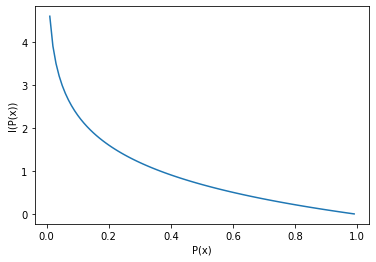

In [3]:
# Self information I(p)
p = np.arange(0.01,1,0.01)
plt.plot(p, -np.log(p))
plt.xlabel('P(x)'); plt.ylabel('I(P(x))');

### Shannon-entropy

The Shannon entropy gives an idea of the amount of uncertainty in the entire probability distribution. It is the expected amount of information in an event drawn from a distribution

$$
H(x)=E_{x\sim p}[I(x)]=E_{x\sim p}[-\log p(x)]=-\int p(x)\log p(x)dx.
$$

It can provide a lower bound on the number of bits needed to encode a symbol. Uniform distributions have high entropy, where in the discrete case $H=\sum_i -p_i\log p_i$. We compute several cases: 
* A perfect dice: $p_i=p=1/N$, so $H=-\sum_i p_i\log p_i=-N(1/N)\log 1/N= \log N=1.79$. 
* A dice with biased $p(6)=0.5$ but the rest uniform with probability $p(x_i\neq 6)=0.1$, $H=1.5$.
* A dice with biased $p(6)=0.9$ but the rest uniform with probability $p(x_i\neq 6)=0.1/5=0.02$, $H=0.49$.
* A dice with $p(6)=0.5$, $p(5)=0.1$, $p(x_i\neq 5, 6)=0$, $H=0.32$. Thus, the entropy decreases as the dice becomes more biased.
* For a dice biased to one number, we can show that as $p_0=p(x_0)\rightarrow 1$, $p_i=p(x_i\neq x_0)\rightarrow0$, then $H=-p_0\log p_0-\sum_i\lim_{p_i\rightarrow 0}p_i\log p_i=0$, as the $-\lim_{p\rightarrow 0}p\log p=-\lim_{p\rightarrow 0}\log p/(1/p)=\lim_{p\rightarrow 0}p$, using L'Hopital's rule. This agrees with the fact that "almost deterministic distributions" have low entropy. 

In [4]:
# Perfect dice
p=1/6; H_p=-6*p*np.log(p); 

# Dice biased to one number
p=(0.1,0.1,0.1,0.1,0.1,0.5); 
H_np=-sum([p[i]*np.log(p[i]) for i in range(6)])
print('Entropy for a perfect dice (H_p=%.2f) is higher than for a non-perfect dice with p(6)=0.5 (H_np=%.2f)' % (H_p, H_np))

Entropy for a perfect dice (H_p=1.79) is higher than for a non-perfect dice with p(6)=0.5 (H_np=1.50)


### Kullback-Leibler (KL) divergence

The KL divergence is used to measure the distance between two distributions. It quantifies the *extra information* needed to send a message containing symbols drawn from the distribution $P$ using a code that has been designed for the distribution $Q$,

$$
D_{KL}(P||Q)=E_{x\sim P}\left[\log\frac{P(x)}{Q(x)}\right]=\int p(x)[\log p(x)-\log q(x)]dx,
$$

where we can see that dividing the probabilities leads to subtracting their 'mutual information'.

$D_{KL}(P||Q)\geq 0$, and $D_{KL}(P||Q)=0$ when $P=Q$, but it is not a true distance as $D_{KL}(P||Q)\neq D_{KL}(Q||P)$.

### Cross-entropy

The cross-entropy measures the expected amount of information needed to encode a message containing symbols drawn from the distribution $P$ using a code that has been designed for the distribution $Q$

$$
H(P,Q)=-E_{x\sim P}[\log Q(x)]=-\int p(x)\log q(x)dx.
$$

From the definition of KL divergence, we see that

$$
H(P,Q)=H(P)+D_{KL}(P||Q)=-\int p(x)\log p(x)+\int p(x)\left[\log\frac{p(x)}{q(x)}\right].
$$

### Joint entropy

Having now two random variables $X$ and $Y$ with joint probability $p(x,y)$, the joint entropy measures the uncertainty of the pair of random variables
\begin{equation}
H(X,Y)=-\int p(x,y)\log p(x,y)dxdy.
\end{equation}
The joint entropy is greater than or equal to the sum of the individual entropies
\begin{equation}
H(X,Y)\geq H(X)+H(Y).
\end{equation}

### Conditional entropy

Conditional entropy quantifies the amount of information needed to describe the outcome of a random variable $Y$ given that the value of another random variable $X$ is known. It is defined as
\begin{equation}
H(Y|X)=E_{(x,y)\sim p(x,y)}[-\log p(y|x)]=-\int p(x,y)\log p(y|x)dxdy.
\end{equation}
It is zero when $Y$ is completely determined by $X$, and it is equal to the entropy of $Y$ when they are independent, as in this case $H(Y|X)=-\int p(x,y)\log p(y|x)dxdy=-\int p(x)p(y)\log p(y)dxdy=-\int p(y)\log p(y)dy=H(Y).$

The following relations hold, as depicted on Venn diagram. The conditional entropy is the difference between the joint entropy and the entropy
\begin{align}
H(Y|X)&=&H(X,Y)-H(X) \\
H(X|Y)&=&H(X,Y)-H(Y).
\end{align}
This is easily shown as 
\begin{align}
H(Y|X)&=&-\int p(x,y)\log p(y|x)dxdy=-\int p(x,y)\log p(x,y)/p(x)dxdy\\
&=&-\int p(x,y)\log p(x,y)dxdy+\int p(x,y)\log p(x)dxdy=H(X,Y)-H(X),
\end{align}
where $\int p(x,y)\log p(x)dxdy=\int p(y|x)p(x)dxdy=\int p(x)dx$.

### Mutual information

Mutual information of two random variables $X$ and $Y$ measures the amount of mutual dependence between the two variables. It is the amount of information obtained about one random variable through observing the other random variable. It is defined as
\begin{equation}
I(X;Y)=KL(p(x,y)||p(x)p(y))=\int p(x,y)\log\frac{p(x,y)}{p(x)p(y)}dxdy.
\end{equation}
It is zero when $X$ and $Y$ are independent. 

The following relations hold
\begin{equation}
I(X;Y)=H(X)-H(X|Y)=H(Y)-H(Y|X)=H(X)+H(Y)-H(X,Y).
\end{equation}

## Bayesian data analysis

### Bayes' rule

Bayesian inference aims to fit a probability model to a dat set, building a probability distribution on the model parametes and unobserved quantities. For this, Bayesian inference follows the following steps [A Gelman et al, Bayesian data analysis, Chapman&Hall/CRC, 2004]. First, we build the *joint probability distribution* for all quantities

$$
p(\theta,y)=p(\theta)p(y|\theta),
$$

where $p(\theta)$ is the *prior distribution* and $p(y|\theta)$ is the sampling or *data distribution*.

Second, we condition on the observed data by calculating the posterior distribution, using *Bayes' rule*

$$
p(\theta|y)=\frac{p(\theta,y)}{p(y)}=\frac{p(\theta)p(y|\theta)}{p(y)},
$$

where $p(y)$ can be expressed as the sum over all possible values of $\theta$

$$
p(y)=\int p(\theta,y)d\theta=\int p(\theta)p(y|\theta)d\theta
$$

Third, we evaluate the model. 

For the case of three or more variables

$$
p(u,v,w)=\int p(u,v|w)p(w)=\int p(u|v,w)p(v|w)p(w).
$$

### Prediction

Let $y=(y_1,\ldots,y_n)$ be the observable data (a measurement repeated $n$ times), $\theta=(\mu,\sigma^2)$ its true value and variance, and $\tilde{y}$ a new unknown observable measurement. Predictive inference allows to make inference about this unknown observable quantity. We model the distribution of the observed variable or *marginal distribution* 

$$
p(y)=\int p(\theta,y)d\theta=\int p(\theta)p(y|\theta)d\theta,
$$

also called *prior predictive distribution*, prior as it is not conditional, and predictive as it is an observable. Once data is modelled, we can make inference about an unknown variable $\tilde{y}$ by calculating the *posterior predictive distribution*, posterior as it is conditional on the observed data and predictive as it is a prediction for an observable,

$$
p(\tilde{y}|y)=\int p(\tilde{y},\theta|y)d\theta=\int p(\tilde{y}|\theta,y)p(\theta|y)d\theta=\int p(\tilde{y}|\theta)p(\theta|y)d\theta, 
$$

where in the last equation we use that $y$ and $\tilde{y}$ are conditionally independent given $\theta$.

### Expectation

The expected value of a random variable is given by

$$
E_x[x]=\int x p(x)dx
$$. 

The conditional expectation of a random variable is the expected value integrating over its conditional distribution

$$
E_x[x|y]=\int x p(x|y)dx. 
$$

Inserting the marginal distribution $p(x)=\int p(x,y)dy$ into the expected value
$$
E_x[x]=\int_x x p(x)dx=\int_x\int_y x p(x,y)dydx=\int_y\int_x x p(x|y)p(y)dxdy=\int_y p(y)dy\int_x x p(x|y)dx=E_y[E_{x|y}[x|y]].
$$.


The expectation of a function is given as follows:

$$
E_{(x,y)}[f]=
\int f(x,y) p(dx,dy)=\int_x\int_y f(x,y) p(x,y)dxdy=\int_x\int_y f(x,y) p(y|x)p(x)dxdy=\int_x dx p(x)\int_y dy p(y|x)f(x,y)=
E_x[E_{y|x}[f(x,y)|x]]=E_y[E_{x|y}[f(x,y)|y]],
$$

where the conditional expectation $E_{y|x}[f]$ of a function integrating on $y$ is a function of $x$.

## Machine learning and statistical learning : Definitions

### Supervised, unsupervised and reinforcement learning

By *learning* we mean a computer program that learns from experience given a task and a performance metric and improves its performance with training. Machine learning and statistical learning share same methods, but while the former was developed in computer science, the latter was born in statistics with emphasis in statistical explanation (of the inputs variables and assessment of predictions). 

*Unsupervised learning* (UL) aims to learn properties and structure of data. In most cases, it can be understood as learning the probability distribution of data $p(X)$ by observing $X$, as in density estimation or denoising. Another case is clustering, where there are not output variables or gold standard, only inputs, also called features or predictors. Data or space are grouped by similarity of features and can provide information about data structure or organization. 

*Supervised learning* (SL) can be seen as learning the posterior distribution $p(X|Y)$ by observing both input variables $X$ and target or output variable $Y$. This accounts for regression problems, where variables are quantitative, and classification, where outputs constitute a finite qualitative set. Data need to be labelled, so it requires input pairs $(x_i,y_i)$. UL is also useful for data processing before SL or for simplification, as labelling data is expensive. 

UL can be also seen as solving $n$ supervised problems
$$
p(X)=\Pi_i p(X_i|X_1,\ldots,X_{i-1}), 
$$
and SL problem can be written in terms of UL by learning $p(X,Y)$
$$
p(X|Y)=\frac{p(X,Y)}{\sum_x p(X,Y)}.
$$

*Reinforcement learning* interact with the enviroment, so there is constant input an not a fixed data set.

### Statistical decision theory

#### Regression problems

Let $X$ be a vector on inputs, $Y$ the target variable, $f(X)$ the prediction model and $L(Y,f(X))$ the loss function for penalizing errors in the prediction. Here, one assumes a statistical model 

$$
Y=f(X)+\epsilon,
$$

where $\epsilon$ is a random error with $E[\epsilon]=0$ and is independent of $X$. 

The *test error*, also named *generalization error*, is the *expected prediction error* (EPE) over the test set

$$
EPE=Err=E[L(Y,f(X))]=\int L(Y,f(X))P(dx,dy),
$$

where $X$ and $Y$ are randomly sampled from their joint distribution $P(X,Y)$. 
*Training error* is the average loss over the training set

$$
Err_{train}=\sum_{i=1}^N[L(y_i,f(x_i))]
$$

For regression problems, variables are quantitative and a typical loss is the squared error

$$
L(X)=(Y-f(X))^2,
$$ 

or the absolute error, $L(X)=|Y-f(X)|$. 

For qualitative variables, the output variable or response $G$ takes values $1, 2, \ldots, K$. Typical loss is the $0$-$1$ loss, $L(G,\hat{G}(X))=I(G\neq\hat{G}(X))$, or the log-likelihood, also named *cross-entropy loss* or *deviance*

$$
L(G,\hat{G}(X))=-2\sum_{k=1}^KI(G=k)\log p_k(X)=-2\log p_G(X), 
$$

where the factor $2$ is only included to agree with the L2 loss.

The EPE for squarred error loss, using the relation above, has the form

$$
EPE(f)=E_{(x,y)}[L(Y,f(X))]=
E_x[E_{y|x}[(Y-f(X))^2|X]]. 
$$

Now, minimizing the EPE wrt $f$, it suffices to minimize $f$ pointwise, as $E_x$ given $x$ removes integrating over $x$,  

$$
f(x)=\textrm{argmin}_c EPE(f)= \textrm{argmin}_c [E_{y|x}[(Y-c)^2|X], 
$$

and differentiating the previous form and equating to zero

$$
2E_{y|x}[(Y-c)|x=0, \quad E_{y|x}[Y]=c, 
$$

so the EPE for the squarred error loss is the *conditional mean*

$$
f(x)=E_{y|x}[Y|X=x]. 
$$

The conditional mean is a function of $X$, as a consequence of the assumed additive model. More general relations will not lead to this simple relation. Deviations from the assumption that errors are independent and indentically distributed can be easily taken into account by modelling the covariance matrix. 

This gives an insight into supervised learning, where the solution to the common problem of minimizing the EPE using pair data examples $(X,Y)$ is the conditional mean. Thus, when we parametrize $f$, for instance, using a neural network $f=f_{\theta}$, training means estimating the conditional mean

$$
E[Y|X=x]=\textrm{argmin}_{\theta} E[(Y-f_{\theta}(X))^2]. 
$$

Nearest-neighbors methods can be seen as approximating the conditional mean by integrating in a local neighgborhood 

$$
f(x)=E_{x}[Y|X\in N_k(X)].
$$

Actually, as $N, k\rightarrow \infty$, then $k/N\rightarrow 0$, and so the $k$-NN method tends converges to the conditional mean [1]. 

Replacing the squarred error loss or $L_2$ by the absolute error or $L_1$ leads to the *conditional median*

$$
f(x)=\textrm{median}[Y|X=x]=\textrm{argmin}_c [E_{y|x}[(|Y-c|)|X]. 
$$

For the case of linear regression, the function is assumed to be known, $f(X)\simeq X^T\beta$, where $X$ is a $(p+1)$-dimensional vector, 

$$
EPE(f)=E_{y|x}[(Y-f(X))^2|X]=E_{y|x}[(Y-X^T\beta)^2|X], 
$$

so differentiating and equating to zero

$$
E[XY]=E[XX^T\beta], \quad \beta=E[XX^T]^{-1}E[XY],
$$

so both NN and least squares approximates conditional mean by averages. 


#### Classification problems

For a categorical discrete output $G$, the EPE becomes 

$$
EPE=E[L(G,G(X))]=E_xE_{G|X}[L(G,G(X))]=E_x\sum_k L(G,G(X))P(G_k|X=x), 
$$

so proceeding as above, we minimize EPE pointwise and $E_x$ is removed given $X=x$, 

$$
\textrm{argmin}_g EPE=\textrm{argmin}_g \sum_k L(G_k,g)P(G_k|X=x).  
$$

For the *zero-one* loss, $L(G_k,G(X))=\mathbb{I}(G(X)\neq G_k)$ , 

$$
\hat{G}(X)=\textrm{argmin}_g 0P(G_k|X=x)+1[1-P(g|X=x)]=\textrm{argmin}_g [1-P(g|X=x)],  
$$

which is minimized for the class with largest probability $P(g|X=x)$. This is known as the *Bayes classifier*: 

$$
\hat{G}(X)=G_k\quad\textrm{if}\quad P(G_k|X=x)=\max_g P(g|X=x),  
$$

which classifies to the class with largest probability using the discrete conditional probability distribution. 

#### Bias-variance tradeoff

If we assume additive Gaussian noise, ie. $Y=f(X)+\epsilon$, $\epsilon\sim \mathcal{N}(0,\sigma^2)$, the EPE of a regression fit $\hat{f}(X)$ using squarred error loss

\begin{eqnarray}
EPE(\hat{f})&=&E[(Y-\hat{f}(X))^2]=E[[(f(X)-\hat{f}(X))+\epsilon]^2]=\\
&=&E[\epsilon^2]+E[(f(X)-\hat{f}(X))^2]+2E[(f(X)-\hat{f}(X))\epsilon] \\
&=&\sigma^2+E[(f(X)-\hat{f}(X))^2]=\sigma^2+MSE(\hat{f}),
\end{eqnarray}

where the last term vanishes with $E[\epsilon]=0$ and the *mean squarred error* (MSE) is 

$$
MSE(\hat{f}) = E[(f(X)-\hat{f}(X))^2].
$$

The MSE can be decomposed as follows: 

\begin{eqnarray}
MSE(\hat{f})&=&E[(f(X)-\hat{f}(X))^2]= \\
&=& E[f^2]+E[\hat{f}^2]-2fE[\hat{f}]\\
&=& (E[\hat{f}^2]-E[\hat{f}]^2)+(E[f^2]+E[\hat{f}]^2-2fE[\hat{f}])\\
&=& (E[\hat{f}^2]-E[\hat{f}]^2)+(E[\hat{f}]-f)^2\\
&=&\textrm{var}(\hat{f}(X))+\textrm{bias}(\hat{f}(X))^2, 
\end{eqnarray}


where we have added and subtracted $E[\hat{f}^2]$, the variance is $\textrm{var}(\hat{f}(X))=E[(\hat{f}-E[\hat{f}])^2]=E[\hat{f}^2]-E[\hat{f}]^2$, and the bias is $\textrm{bias}(\hat{f}(X))=(E[\hat{f}]-f)^2$. 

Thus, the EPE at a given point $x_0$ can be then decomposed as 

$$
EPE(\hat{f})=\sigma^2+MSE(\hat{f}(x_0))=\sigma^2+\textrm{var}(\hat{f}(x_0))+\textrm{bias}(\hat{f}(x_0))^2.
$$

The first term is the irreducible error, or variance of the data around its true mean $f(X)$, as $\textrm{var}[Y]=E[(Y-E[Y])^2]=E[(Y-f(X))^2]$, and which is equal to the noise variance, with $\textrm{var}[Y]=\textrm{var}[\epsilon]=\sigma^2$; the second term is the variance of the model $\hat{f}$ around its mean; and the third one is the squared bias, or amount by which the model estimate $E[\hat{f}]$ differs from the true mean. 

#### Example bias-variance decomposition

For the model $f(X)=X\sin(X)$, we compute EPE, MSE and variance and bias for polynomial regression using Ridge regression. We display errors vs model complexity.

In [ ]:
# Simulate y= f(x)+eps
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

np.random.RandomState(0)

# Training data 
# y = f(x)+eps, eps=sigma*N(0,1)
m = 50 # number of points
N = 10 # number of evaluations
x = np.linspace(0,10,30).reshape(-1, 1)
#f_fun = lambda x: x+0.3*x**2-0.025*x**3
f_fun = lambda x: x*np.sin(x)
f = f_fun(x)
sigma = 2
y_fun = lambda f, sigma, N: f+sigma*np.random.randn(f.shape[0],N)
y = y_fun(f=f, sigma=sigma, N=N)

# Test data
x_test = np.linspace(0,10,20).reshape(-1, 1)
# [i for i in zip(x,x_test)]
f_test = f_fun(x_test)
y_test = y_fun(f=f_test, sigma=sigma, N=N)

# Model: Polynomial regression
# based on https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py
#f_hat = Pipeline([("poly_features", PolynomialFeatures(degree=5)), ("Linear_regres", linear_model.LinearRegression())])
degree_max = 10
degree_all = range(1,degree_max)
errs_mean_models = np.zeros((degree_max-1, 5))
f_hat_all = []
err_train = []
err_test = []
for i, degree in enumerate(degree_all):
  f_hat = Pipeline([("poly_features", PolynomialFeatures(degree=degree)), ("Linear_regres", linear_model.Ridge(alpha=0.05))])

  # Train
  f_hat.fit(x,y)
  f_hat_all.append(f_hat)

  # Predict for train and test sets
  y_hat = f_hat.predict(x)
  y_test_hat = f_hat.predict(x_test)
  #err_test.append(f_hat.score(x_test,y_test))
  err_train.append(np.mean((y_hat[:,1]-y[:,1])**2))
  err_test.append(np.mean((y_test_hat[:,1]-y_test[:,1])**2))

  # Errors estimated at each point
  #
  # EPE=E[(Y-f_pred(X))^2]
  epe = np.mean((y_test-y_test_hat)**2, axis=1)
  # MSE
  mse = np.mean((f_test-y_test_hat)**2, axis=1)
  # VAR = E[f_pred(X)^2]-E[f_pred(X)]^2
  var = np.mean(y_test_hat**2, axis=1)-(np.mean(y_test_hat, axis=1)**2)
  # Bias = (f-E[f_pred])
  bias = f_test-np.mean(y_test_hat, axis=1).reshape(-1,1)
  bias2 = bias**2
  # Irreducible error
  sigma2 = sigma**2

  errs_mean = [np.mean(epe), np.mean(mse), np.mean(var), np.mean(bias2), sigma2]
  errs_mean_models[i, :] = errs_mean

errs_names = ('EPE','MSE','Var','Bias**2','sigma**2')

Minimum MSE for degree 6


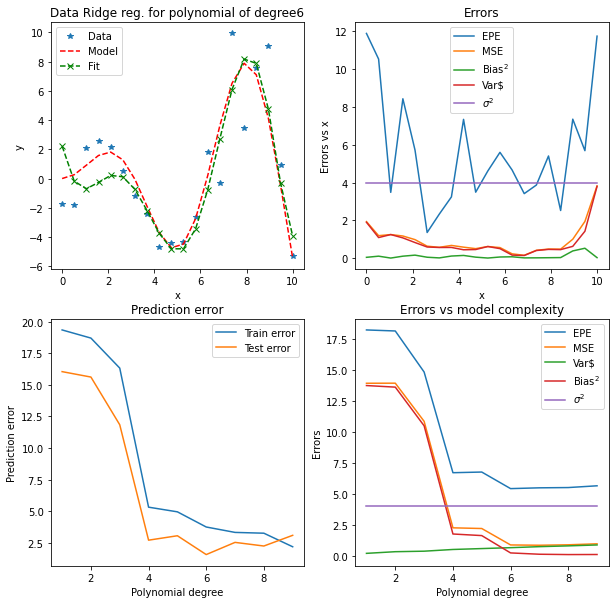

In [ ]:
# Minimum MSE
model_best_ind = np.argmin(errs_mean_models[:,1])
model_best = f_hat_all[model_best_ind]
y_test_hat = model_best.predict(x_test)
print('Minimum MSE for degree ' + str(model_best_ind))

# Display
N_plot = 1
plt.figure(figsize=(10,10))
#
plt.subplot(2,2,1)
plt.plot(x_test, y_test[:,0:N_plot],'*')
plt.plot(x_test,f_test,'r--')
plt.plot(x_test,y_test_hat[:,0:N_plot],'--xg')
plt.legend(['Data','Model','Fit'])
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data Ridge reg. for polynomial of degree' + str(model_best_ind));
#
# Plot errors at each point
plt.subplot(2,2,2)
plt.plot(x_test, epe, label='EPE')
plt.plot(x_test, mse, label='MSE')
plt.plot(x_test, bias2, label=r'Bias$^2$')
plt.plot(x_test, var, label=r'Var$')
plt.plot(x_test, sigma2*np.ones_like(x_test), label='$\sigma^2$')
plt.xlabel('x'); plt.ylabel('Errors vs x');
plt.title('Errors')
plt.legend()
#
# Train and test error
plt.subplot(2,2,3)
plt.plot(degree_all, err_train)
plt.plot(degree_all, err_test)
plt.xlabel('Polynomial degree'); plt.ylabel('Prediction error');
plt.legend(['Train error', 'Test error'])
plt.title('Prediction error')

# Train and test error
model_complexity = range(1,)
plt.subplot(2,2,4)
plt.plot(degree_all, errs_mean_models[:,0], label='EPE')
plt.plot(degree_all, errs_mean_models[:,1], label='MSE')
plt.plot(degree_all, errs_mean_models[:,2], label=r'Var$')
plt.plot(degree_all, errs_mean_models[:,3], label=r'Bias$^2$')
plt.plot(degree_all, errs_mean_models[:,4], label='$\sigma^2$')
plt.xlabel('Polynomial degree'); plt.ylabel('Errors');
plt.title('Errors vs model complexity')
plt.legend()

Training error decreases monotonically with model complexity while test error increases for polynomial degree larger than six. The higher the polynomial degree the higher model complexity, and the higher the variance and lower the bias. The variance increases linearly and have low values over all. Bias is extremely large for polynomial degree lower than 4 (large smoothing) and decreases slowly after degree 4. 

## References

[1] Trevor Hastie and Robert Tibshirani, and Jerome Friedman. The elements of statistical learning, Springer New York Inc., Springer Series in Statistics, 2001.